In [29]:
# !pip install matplotlib

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
current_os = "w" if os.name == "nt" else "l"
other_os = "l" if current_os == "w" else "w"
current_os

'w'

In [32]:
def convert_path(path, to=current_os):
    if to in ["w", "win", "windows"]:
        path = path.replace("/mnt/pa_cpg", "Y:")
        path = path.replace("/data/pathology", "Z:")
        path = path.replace("/mnt/pa_cpgarchive1", "W:")
        path = path.replace("/mnt/pa_cpgarchive2", "X:")
        path = path.replace("/", "\\")
    if to in ["u", "unix", "l", "linux"]:
        path = path.replace("Y:", "/mnt/pa_cpg")
        path = path.replace("Z:", "/data/pathology")
        path = path.replace("W:", "/mnt/pa_cpgarchive1")
        path = path.replace("X:", "/mnt/pa_cpgarchive2")
        path = path.replace("\\", "/")
    return path

In [33]:
path = 'publication_download_links.csv'
df = pd.read_csv(path) 
df.head()

,bibkey,url,bib_title,bib_doi,match_title,match_doi,title_match_ratio,same_doi,search_string
0,hoek09,https://repository.ubn.ru.nl/handle/2066/79762,Multiparametric MRI for prostate cancer screening,NaN,[Multiparametric MRI for prostate cancer scree...,NaN,0.98,False,Multiparametric MRI for prostate cancer screen...
1,hoes11,https://repository.ubn.ru.nl/handle/2066/97657,Association of the transfer coefficient of the...,https://doi.org/10.1183/09031936.00050711,Association of the transfer coefficient of the...,https://doi.org/10.1183/09031936.00050711,1.00,True,Association of the transfer coefficient of the...
2,hoes12,https://repository.ubn.ru.nl/handle/2066/110461,CT-quantified emphysema distribution is associ...,https://doi.org/10.1183/09031936.00186311,CT-quantified emphysema distribution is associ...,https://doi.org/10.1183/09031936.00186311,1.00,True,CT-quantified emphysema distribution is associ...
3,hoes12a,https://repository.ubn.ru.nl/handle/2066/108582,Lung function decline in heavy male smokers re...,https://doi.org/10.1378/chest.11-2837,Lung function decline in heavy male smokers re...,https://doi.org/10.1378/chest.11-2837,1.00,True,Lung function decline in heavy male smokers re...
4,hoge12,https://repository.ubn.ru.nl/handle/2066/110554,Clavicle segmentation in chest radiographs,https://doi.org/10.1016/j.media.2012.06.009,Clavicle segmentation in chest radiographs,https://doi.org/10.1016/j.media.2012.06.009,1.00,True,Clavicle segmentation in chest radiographs Hog...


# DOI

In [34]:
len_df = len(df)
len_df

156

In [35]:
sum(df['same_doi'])

126

In [ ]:
df

In [36]:
156 - sum(df['same_doi']) 

30

# TITLE

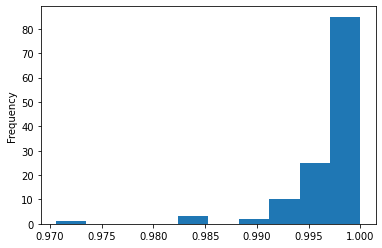

In [42]:
ax = df[df['same_doi']]['title_match_ratio'].plot.hist()
# ax.set_xlim(0, 1)

<AxesSubplot:ylabel='Frequency'>

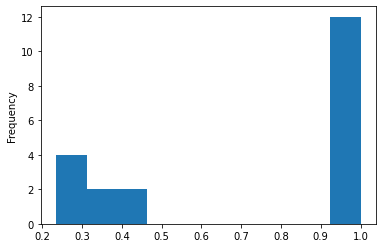

In [43]:
v['title_match_ratio'].plot.hist()

### Appears some might still be the right one, but missing doi for example

# TITLE MATCHES

In [51]:
df_match_title_no_match_doi = df[(~df['same_doi']) & (df['title_match_ratio']>0.9)]
print(len(df_match_title_no_match_doi))
df_match_title_no_match_doi.head()

12


,bibkey,url,bib_title,bib_doi,match_title,match_doi,title_match_ratio,same_doi,search_string
0,hoek09,https://repository.ubn.ru.nl/handle/2066/79762,Multiparametric MRI for prostate cancer screening,NaN,[Multiparametric MRI for prostate cancer scree...,NaN,0.980000,False,Multiparametric MRI for prostate cancer screen...
11,huis01,https://repository.ubn.ru.nl/handle/2066/122355,Accurate estimation of pharmacokinetic contras...,NaN,Accurate estimation of pharmacokinetic contras...,https://doi.org/10.1002/jmri.1085,0.994764,False,Accurate estimation of pharmacokinetic contras...
13,huis07,https://repository.ubn.ru.nl/handle/2066/53276,Chestwall segmentation in 3D breast ultrasound...,https://doi.org/10.1007/978-3-540-73273-0_21,Chestwall segmentation in 3D breast ultrasound...,NaN,0.993631,False,Chestwall segmentation in 3D breast ultrasound...
23,jaco11,https://repository.ubn.ru.nl/handle/2066/96752,Computer-Aided Detection of Ground Glass Nodul...,https://doi.org/10.1007/978-3-642-23626-6_26,Computer-aided detection of ground glass nodul...,NaN,1.000000,False,Computer-Aided Detection of Ground Glass Nodul...
24,jaco12a,https://repository.ubn.ru.nl/handle/2066/110713,Coronary Artery Calcium Can Predict All-Cause ...,https://doi.org/10.2214/AJR.10.5577,Coronary artery calcium can predict all-cause ...,https://doi.org/10.2214/AJR.https://doi.org/10...,0.995918,False,Coronary Artery Calcium Can Predict All-Cause ...


some mistakes (e.g. double doi urls?) in repo

# NO MATCH

In [56]:
df_no_match = df[(~df['same_doi']) & ~(df['title_match_ratio']>0.9)]
print(len(df_no_match))
df_no_match

18


,bibkey,url,bib_title,bib_doi,match_title,match_doi,title_match_ratio,same_doi,search_string
26,jaco15,NaN,"Solid, Part-Solid, or Non-solid?: Classificati...",https://doi.org/10.1097/RLI.0000000000000121,NaN,NaN,NaN,False,"Solid, Part-Solid, or Non-solid? Classificatio..."
28,jaco21,https://repository.ubn.ru.nl/handle/2066/231282,Assisted versus Manual Interpretation of Low-D...,https://doi.org/10.1148/rycan.2021200160,Lung cancer screening: use the scan to decide ...,NaN,0.338983,False,Assisted versus Manual Interpretation of Low-D...
30,jara15,NaN,Reduced Bone Density and Vertebral Fractures i...,https://doi.org/10.1513/AnnalsATS.201412-591OC,NaN,NaN,NaN,False,Reduced Bone Density and Vertebral Fractures i...
31,kauc20,NaN,ESR/ERS statement paper on lung cancer screening,https://doi.org/10.1007/s00330-020-06727-7,NaN,NaN,NaN,False,ESR/ERS statement paper on lung cancer screeni...
47,leen20,NaN,The 2019 International Society of Urological P...,https://doi.org/10.1097/PAS.0000000000001497,NaN,NaN,NaN,False,The 2019 International Society of Urological P...
54,litj14d,https://repository.ubn.ru.nl/handle/2066/173248,Quantitative identification of magnetic resona...,https://doi.org/10.1117/1.JMI.1.3.035001,MRI-guided focal therapy in patients with loca...,NaN,0.321429,False,Quantitative identification of magnetic resona...
57,litj18,https://repository.ubn.ru.nl/handle/2066/241323,1399 H&E-stained sentinel lymph node sections ...,https://doi.org/10.1093/gigascience/giy065,Mechanistic models for the prediction of brain...,NaN,0.398268,False,1399 H&E-stained sentinel lymph node sections ...
60,maas19,NaN,"A Single-Arm, Multicenter Validation Study of ...",https://doi.org/10.1097/RLI.0000000000000558,NaN,NaN,NaN,False,"A Single-Arm, Multicenter Validation Study of ..."
98,prok20,NaN,CO-RADS - A categorical CT assessment scheme f...,https://doi.org/10.1148/radiol.2020201473,NaN,NaN,NaN,False,CO-RADS - A categorical CT assessment scheme f...
107,roel12,NaN,Concurrent Endometrial Intraepithelial Carcino...,https://doi.org/10.1097/IGC.0b013e3182434a81,NaN,NaN,NaN,False,Concurrent Endometrial Intraepithelial Carcino...
